In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import os

In [4]:
SalaryData_Train=pd.read_csv('/content/SalaryData_Train.csv')
SalaryData_Train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
#We also need Test data
SalaryData_Test=pd.read_csv('/content/SalaryData_Test.csv')
SalaryData_Test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


**Exploratory Data Analysist(EDA)**

In [7]:
SalaryData_Train.shape

(30161, 14)

In [8]:
SalaryData_Test.shape

(15060, 14)

In [9]:
SalaryData_Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
SalaryData_Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
#Finding special character in this data frame
SalaryData_Train.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [ ]:
SalaryData_Test.isin(['?']).sum(axis=0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

**Explore Catagorical Variable**

In [11]:
#Find Catagorical variable
Categorical=[var for var in SalaryData_Train.columns if SalaryData_Train[var].dtype=='O']   #O its capital O and '=' is for Categorical variable

print('There are {} categorical variables\n'.format(len(Categorical)))

print('The categorical variables are:\n\n',Categorical)        #Salary is target variable.because Salay is dependent on all

There are 9 categorical variables

The categorical variables are:

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [12]:
SalaryData_Train[Categorical].head(10)

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
5,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
6,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,Jamaica,<=50K
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K
8,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,>50K
9,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,>50K


In [13]:
#Check missing values in catagorical variable
SalaryData_Train[Categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [14]:
#checking frequency values in categorical data
for var in Categorical:
    print(SalaryData_Train[var].value_counts())


 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [15]:
for var in Categorical:
    print(SalaryData_Train[var].value_counts()/np.float(len(SalaryData_Train)))

 Private             0.738868
 Self-emp-not-inc    0.082855
 Local-gov           0.068532
 State-gov           0.042406
 Self-emp-inc        0.035609
 Federal-gov         0.031266
 Without-pay         0.000464
Name: workclass, dtype: float64
 HS-grad         0.326249
 Some-college    0.221379
 Bachelors       0.167236
 Masters         0.053944
 Assoc-voc       0.043334
 11th            0.034747
 Assoc-acdm      0.033421
 10th            0.027187
 7th-8th         0.018468
 Prof-school     0.017970
 9th             0.015086
 12th            0.012500
 Doctorate       0.012433
 5th-6th         0.009549
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64
 Married-civ-spouse       0.466331
 Never-married            0.322436
 Divorced                 0.139717
 Separated                0.031133
 Widowed                  0.027420
 Married-spouse-absent    0.012267
 Married-AF-spouse        0.000696
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13388

<ipython-input-15-65e4ebb1c4bb>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(SalaryData_Train[var].value_counts()/np.float(len(SalaryData_Train)))
<ipython-input-15-65e4ebb1c4bb>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print(SalaryData_Train[var].value_counts()/np.float(len(SalaryData_Train)))
<ipython-input-15-65e4ebb1

In [16]:
# check labels in workclass variable

SalaryData_Train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [17]:
# check frequency distribution of values in workclass variable

SalaryData_Train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

**Explore Numerical Variable**

In [18]:
# find numerical variables

Numerical = [var for var in SalaryData_Train.columns if SalaryData_Train[var].dtype!='O']    #! is for Numerical variable

print('There are {} numerical variables\n'.format(len(Numerical)))
print('The numerical variables are :', Numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [19]:
# view the numerical variables

SalaryData_Train[Numerical].head(10)

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0,40
1,50,13,0,0,13
2,38,9,0,0,40
3,53,7,0,0,40
4,28,13,0,0,40
5,37,14,0,0,40
6,49,5,0,0,16
7,52,9,0,0,45
8,31,14,14084,0,50
9,42,13,5178,0,40


In [20]:
# check missing values in numerical variables

SalaryData_Train[Numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [21]:
pd.crosstab(SalaryData_Train['occupation'],SalaryData_Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,3223,498
Armed-Forces,8,1
Craft-repair,3122,908
Exec-managerial,2055,1937
Farming-fishing,874,115
Handlers-cleaners,1267,83
Machine-op-inspct,1720,245
Other-service,3080,132
Priv-house-serv,142,1


In [22]:
pd.crosstab(SalaryData_Train['workclass'],SalaryData_Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,578,365
Local-gov,1458,609
Private,17409,4876
Self-emp-inc,474,600
Self-emp-not-inc,1785,714
State-gov,935,344
Without-pay,14,0


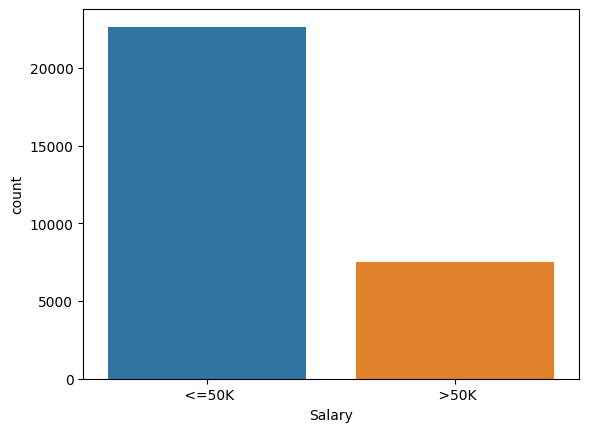

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [23]:
sns.countplot(x='Salary',data= SalaryData_Train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
SalaryData_Train['Salary'].value_counts()

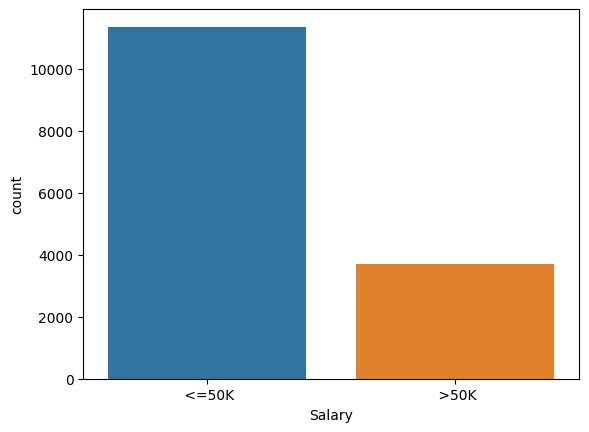

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

In [24]:
sns.countplot(x='Salary',data= SalaryData_Test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
SalaryData_Test['Salary'].value_counts()

***Declare Target Variable***

In [25]:
X = SalaryData_Train.drop(['Salary'], axis=1)   #in X we obtain data without target column

y = SalaryData_Train['Salary']

**Split the data into train and test data set**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
# check the shape of X_train and X_test

X_Train.shape, X_Test.shape


((21112, 13), (9049, 13))

**Feature Engineering**

In [29]:
X_Train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [30]:
X_Test.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
dtype: object

In [ ]:
#we already know categorical variable and numerical variable

In [31]:
# display categorical variables

Categorical = [col for col in X_Train.columns if X_Train[col].dtypes == 'O']

Categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [ ]:
numerical = [col for col in X_Train.columns if X_Train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [32]:
X_Train[Categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [33]:
for col in Categorical:
    if X_Train[col].isnull().mean()>0:
        print(col, (X_Train[col].isnull().mean()))

In [34]:
# impute missing categorical variables with most frequent value

for DF2 in [X_Train, X_Test]:
    DF2['workclass'].fillna(X_Train['workclass'].mode()[0], inplace=True)
    DF2['occupation'].fillna(X_Train['occupation'].mode()[0], inplace=True)
    DF2['native'].fillna(X_Train['native'].mode()[0], inplace=True)

**Encoding catagorical Encoder**

In [35]:
!pip install category_encoders

import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [36]:
Categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [37]:
for col in Categorical:
    if X_Train[col].isnull().mean()>0:
        print(col, (X_Train[col].isnull().mean()))

In [38]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
                                 'race', 'sex', 'native'])

X_Train = encoder.fit_transform(X_Train)

X_Test = encoder.transform(X_Test)

In [39]:
X_Train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
8166,54,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7138,21,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
437,30,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5436,42,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6541,37,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
X_Test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39,native_40
25338,21,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18840,21,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8391,56,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18258,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16669,53,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [41]:
X_Train.shape

(21112, 102)

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling

**Model Building**

In [42]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

In [43]:
# instantiate the model
GNB = GaussianNB()

In [44]:
# fit the model
GNB.fit(X_Train, y_Train)

GaussianNB()

In [45]:
#Predict the result
y_pred = GNB.predict(X_Test)

y_pred

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [46]:
#check accuracy of score
from sklearn.metrics import accuracy_score

(accuracy_score(y_Test, y_pred))
print('Model accuracy score is: {0:0.4f}'.format(accuracy_score(y_Test, y_pred)))

Model accuracy score is: 0.8014


Here, y_test are the true class labels and y_pred are the predicted class labels

In [47]:
#Checking The Training set score
print('Training Score is: {0:0.4f}'.format(GNB.score(X_Train,y_Train)))


Training Score is: 0.8045


In [48]:
y_Test.value_counts()

 <=50K    6798
 >50K     2251
Name: Salary, dtype: int64

In [49]:
print('Testing Score is : {0:0.4f}'.format(GNB.score(X_Test,y_Test)))

Testing Score is : 0.8014


In [50]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score is : {0:0.4f}'. format(null_accuracy))

Null accuracy score is : 0.7582


We can see that our model accuracy score is 0.8045 but null accuracy score is 0.7582. So,
we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

**Confusion Metrix**

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(y_Test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5444 1354]
 [ 443 1808]]

True Positives(TP) =  5444

True Negatives(TN) =  1808

False Positives(FP) =  1354

False Negatives(FN) =  443


<Axes: >

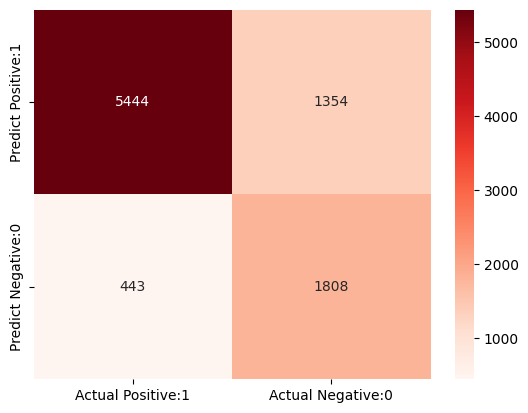

In [53]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Reds')


In [55]:
FP=1354
TN=1808

**Classification Accuracy**

In [57]:
#Classification Metrix
from sklearn.metrics import classification_report

print(classification_report(y_Test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.92      0.80      0.86      6798
        >50K       0.57      0.80      0.67      2251

    accuracy                           0.80      9049
   macro avg       0.75      0.80      0.76      9049
weighted avg       0.84      0.80      0.81      9049



In [58]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [59]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy is : {0:0.4f}'.format(classification_accuracy))

Classification accuracy is : 0.8014


In [60]:
#  precision score

precision = TP / float(TP + FP)

print('Precision score is : {0:0.4f}'.format(precision))

Precision score is : 0.8008


In [61]:
#True Positive Rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9247


In [64]:
#False Positive Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4282


RUC and AUC Score

In [65]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = GNB.predict_proba(X_Test)[0:10]
y_pred_prob

array([[9.99969132e-01, 3.08679978e-05],
       [9.97453165e-01, 2.54683515e-03],
       [8.47046108e-01, 1.52953892e-01],
       [9.99999907e-01, 9.34921633e-08],
       [7.63746119e-02, 9.23625388e-01],
       [9.99595175e-01, 4.04825176e-04],
       [6.43316895e-06, 9.99993567e-01],
       [5.74273727e-01, 4.25726273e-01],
       [5.13487314e-04, 9.99486513e-01],
       [9.99999604e-01, 3.96365464e-07]])

In each row, the numbers sum to 1

There are 2 columns which correspond to 2 classes - <=50K and >50K

* Class 0 => <=50K - Class that a person makes less than equal to 50K.

* Class 1 => >50K - Class that a person makes more than 50K.

In [66]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K
GNB.predict_proba(X_Test)[0:10, 1]

array([3.08679978e-05, 2.54683515e-03, 1.52953892e-01, 9.34921633e-08,
       9.23625388e-01, 4.04825176e-04, 9.99993567e-01, 4.25726273e-01,
       9.99486513e-01, 3.96365464e-07])

In [67]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = GNB.predict_proba(X_Test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


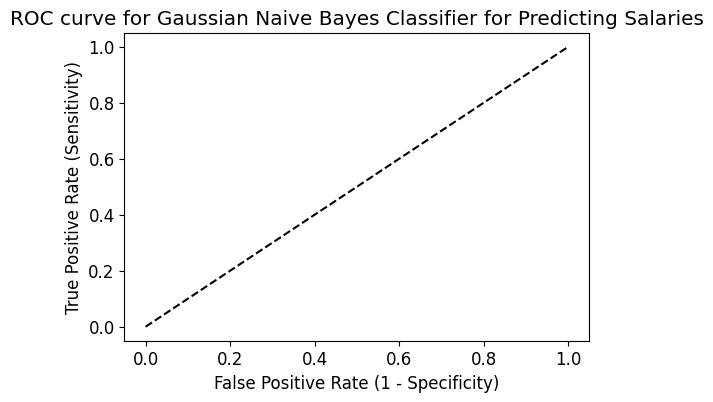

In [69]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_Test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [70]:
#ROC and AUC
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_Test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8911


This AUC score is a very good result,indicating that your binary classifier is peforming well interms of distinguishing between classes.It suggest that the model is making accurate presdiction with a strong ability to seperate the positive and negative instamnces